In [ ]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 6.5 MB/s eta 0:00:00


In [ ]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 11.6 MB/s eta 0:00:00


In [ ]:
import re
import nltk
import emoji
import unicodedata
import contractions
import inflect
import spacy
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize # Import sent_tokenize as well
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 97.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
def clean_text(input_text):

    clean_text = re.sub('<[^<]+?>', '', input_text)
    clean_text = re.sub(r'http\S+', '', clean_text)
    clean_text = convert_emojis_to_words(clean_text)
    clean_text = clean_text.lower()
    clean_text = re.sub('\s+', ' ', clean_text)
    clean_text = unicodedata.normalize('NFKD', clean_text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    clean_text = contractions.fix(clean_text)
    clean_text = re.sub('[^a-zA-Z0-9\s\.]', '', clean_text)
    temp = inflect.engine()
    words = []

    for word in clean_text.split():
        if word.isdigit():
            words.append(temp.number_to_words(word))
        else:
            words.append(word)
    clean_text = ' '.join(words)

    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(clean_text)
    tokens = [token for token in tokens if token not in stop_words]
    clean_text = ' '.join(tokens)
    clean_text = re.sub('([a-z])\.([A-Z])', r'\1. \2', clean_text)
    clean_text = re.sub(r'[^\w\s.]', '', clean_text)
    return clean_text

In [ ]:
def convert_emojis_to_words(text):

    text = emoji.demojize(text, delimiters=(" ", " "))
    text = text.replace(":", "").replace("_", " ")
    return text

In [ ]:
def text_vectorize(input_text):
    vectorizer = CountVectorizer()
    counts_matrix = vectorizer.fit_transform(input_text)
    dense_matrix = counts_matrix.todense()
    return np.array(dense_matrix)

In [ ]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
def pos_tag(input_text):

    doc = nlp(input_text)
    tagged_output = []
    for token in doc:
        tagged_output.append(token.text + '_' + token.pos_)
    tagged_output_str = ' '.join(tagged_output)

    return tagged_output_str

In [ ]:
def lemmatize_and_vectorize(tagged_text):

    text = " ".join([word.split("_")[0] for word in tagged_text.split()])
    doc = nlp(text)
    vector_list = []

    for token in doc:
        lemma = token.lemma_
        pos = token.pos_
        if pos == "VERB":
            vec = token.vector
        else:
            vec = token.vector + nlp(pos).vector
        vector_list.append(vec)
    vector_array = np.array(vector_list)
    return vector_array

In [ ]:
import pandas as pd
data= ("/content/IMDB Dataset.csv")
df=pd.read_csv(data)
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
cleaned_text = df['review'].head().apply(clean_text)
print(cleaned_text)

0    one reviewers mentioned watching one oz episod...
1    wonderful little production . filming techniqu...
2    thought wonderful way spend time hot summer we...
3    basically family little boy jake thinks zombie...
4    petter matteis love time money visually stunni...
Name: review, dtype: object


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(cleaned_text)

In [ ]:
labels = ['positive','negative','neutral']
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(labels)

In [ ]:
cleaned_text = df['review'].head().apply(clean_text)
print(cleaned_text)
all_text = " ".join(cleaned_text)
print(all_text)

0    one reviewers mentioned watching one oz episod...
1    wonderful little production . filming techniqu...
2    thought wonderful way spend time hot summer we...
3    basically family little boy jake thinks zombie...
4    petter matteis love time money visually stunni...
Name: review, dtype: object
one reviewers mentioned watching one oz episode hooked . right exactly happened me.the first thing struck oz brutality unflinching scenes violence set right word go . trust show faint hearted timid . show pulls punches regards drugs sex violence . hardcore classic use word.it called oz nickname given oswald maximum security state penitentary . focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda . city home many .. aryans muslims gangstas latinos christians italians irish .... scuffles death stares dodgy dealings shady agreements never far away.i would say main appeal show due fact goes shows would dare . forget pretty pictures painte

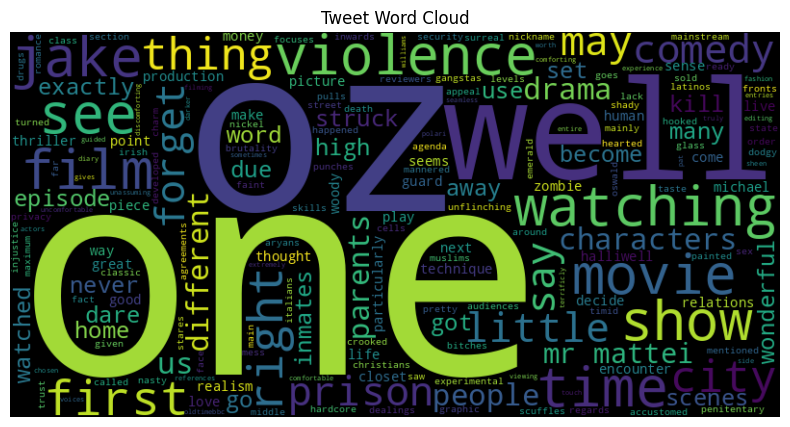

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='black',
    max_words=200,
    # Changed 'infernoz' to 'viridis' which is a valid colormap
    colormap='viridis').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Tweet Word Cloud")
plt.show()

In [ ]:
df = pd.read_csv('/content/IMDB Dataset.csv', on_bad_lines='skip')

In [ ]:
df = pd.read_csv(data)
df.head()
df.columns

dfrev = df['review']
dfrev.head()

,review
0,One of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...
2,I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is..."


In [ ]:
from nltk.stem.porter import PorterStemmer

In [ ]:
corpus=[]
for i in range(0,1000):
  review = re.sub('[^a-zA-Z]',' ',df['review'][i])
  review = review.lower()
  review = review.split()

  review_words = [word for word in review if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()

  review = [ps.stem(word) for word in review_words]
  review = ' '.join(review)
  corpus.append(review)

In [ ]:
corpus[0:5]

['one review mention watch oz episod hook right exactli happen br br first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use word br br call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home mani aryan muslim gangsta latino christian italian irish scuffl death stare dodgi deal shadi agreement never far away br br would say main appeal show due fact goe show dare forget pretti pictur paint mainstream audienc forget charm forget romanc oz mess around first episod ever saw struck nasti surreal say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard sold nickel inmat kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom comfort uncomfort view that get touch d

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df.iloc[:1000, 1].values)
X.shape

(1000, 1500)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(800, 1500) (800,)
(200, 1500) (200,)


In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [ ]:
y_pred = classifier.predict(X_test)
print(y_pred.shape)

(200,)


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred,average='weighted')
score3 = recall_score(y_test,y_pred,average='weighted')

print
print("---Results---")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

---Results---
Accuracy score is: 78.5%
Precision score is: 0.79
Recall score is: 0.79


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

print(cm)

[[80 24]
 [19 77]]


In [ ]:
cm

array([[80, 24],
       [19, 77]])

Text(95.72222222222221, 0.5, 'Actual values')

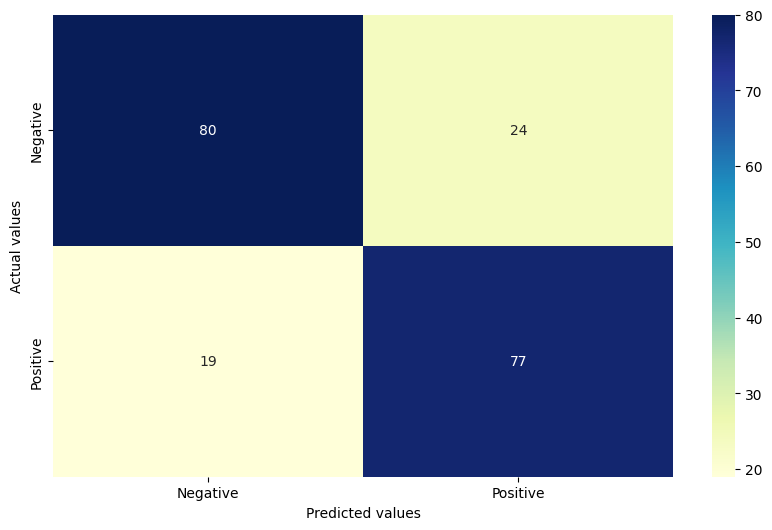

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (10,6))
sns.heatmap(cm, annot=True, cmap="YlGnBu", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

In [ ]:
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier = MultinomialNB(alpha=i)
  temp_classifier.fit(X_train, y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  score = accuracy_score(y_test, temp_y_pred)
  print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    alpha_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))

Accuracy score for alpha=0.1 is: 77.0%
Accuracy score for alpha=0.2 is: 77.0%
Accuracy score for alpha=0.3 is: 77.0%
Accuracy score for alpha=0.4 is: 77.0%
Accuracy score for alpha=0.5 is: 78.0%
Accuracy score for alpha=0.6 is: 78.0%
Accuracy score for alpha=0.7 is: 78.0%
Accuracy score for alpha=0.8 is: 78.0%
Accuracy score for alpha=0.9 is: 78.5%
Accuracy score for alpha=1.0 is: 78.5%
--------------------------------------------
The best accuracy is 78.5% with alpha value as 0.9


In [ ]:
classifier = MultinomialNB(alpha=0.2)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.2)

In [ ]:
def predict_sentiment(sample_review):
  sample_review = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_review)
  sample_review = sample_review.lower()
  sample_review_words = sample_review.split()
  sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_review = [ps.stem(word) for word in sample_review_words]
  final_review = ' '.join(final_review)

  temp = cv.transform([final_review]).toarray()
  return classifier.predict(temp)

In [ ]:
sample_review = 'It tastes nice.'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review.')
else:
  print('This is a NEGATIVE review!')

This is a POSITIVE review.


In [ ]:
sample1 = 'This palce is awful'
if predict_sentiment(sample1):
  print('This is a POSITIVE review.')
else:
  print('This is a NEGATIVE review!')

This is a NEGATIVE review!


In [ ]:
sample2 = ''